In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
csv_filepath = "sumo_data.csv"
df = pd.read_csv(csv_filepath)
print(df.head())

   state_N  state_S  state_E  state_W  action  reward  next_state_N  \
0        0        0        0        0       0    0.00             0   
1        0        0        0        0       0   -0.02             0   
2        0        0        0        0       0   -0.02             0   
3        0        0        0        0       0   -0.02             0   
4        0        0        0        0       1    0.23             0   

   next_state_S  next_state_E  next_state_W   done  
0             0             0             0  False  
1             0             0             0  False  
2             0             0             0  False  
3             0             0             0  False  
4             0             0             0  False  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_N       282 non-null    int64  
 1   state_S       282 non-null    int64  
 2   state_E       282 non-null    int64  
 3   state_W       282 non-null    int64  
 4   action        282 non-null    int64  
 5   reward        282 non-null    float64
 6   next_state_N  282 non-null    int64  
 7   next_state_S  282 non-null    int64  
 8   next_state_E  282 non-null    int64  
 9   next_state_W  282 non-null    int64  
 10  done          282 non-null    bool   
dtypes: bool(1), float64(1), int64(9)
memory usage: 22.4 KB


In [4]:
state_cols = ['state_N', 'state_S', 'state_E', 'state_W']
next_state_cols = ['next_state_N', 'next_state_S', 'next_state_E', 'next_state_W']

df['state_tuple'] = df[state_cols].apply(tuple, axis=1)
df['next_state_tuple'] = df[next_state_cols].apply(tuple, axis=1)

num_unique_states = df['state_tuple'].nunique()
print(f"Number of unique states (s): {num_unique_states}")
num_unique_next_states = df['next_state_tuple'].nunique()
print(f"Number of unique next_states (s'): {num_unique_next_states}")

print("\nTop 10 most frequent states (s):")
top_states = df['state_tuple'].value_counts().nlargest(10)
print(top_states)
print(f"\nPercentage covered by top 10 states: {top_states.sum() / len(df) * 100:.2f}%")

Number of unique states (s): 11
Number of unique next_states (s'): 9

Top 10 most frequent states (s):
state_tuple
(0, 0, 0, 0)    168
(1, 0, 0, 0)     30
(0, 0, 0, 1)     21
(0, 0, 0, 2)     18
(2, 0, 0, 1)     17
(1, 0, 0, 1)     12
(0, 0, 1, 1)      7
(0, 0, 1, 2)      4
(2, 0, 0, 0)      3
(0, 0, 1, 0)      1
Name: count, dtype: int64

Percentage covered by top 10 states: 99.65%


C:\Users\kfhan\AppData\Local\Temp\ipykernel_37180\4028134077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='state_N', data=df, ax=axes_states[0, 0], palette="viridis").set_title('North Approach Congestion')
C:\Users\kfhan\AppData\Local\Temp\ipykernel_37180\4028134077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='state_S', data=df, ax=axes_states[0, 1], palette="viridis").set_title('South Approach Congestion')
C:\Users\kfhan\AppData\Local\Temp\ipykernel_37180\4028134077.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplo


Plot saved: state_component_distribution.png


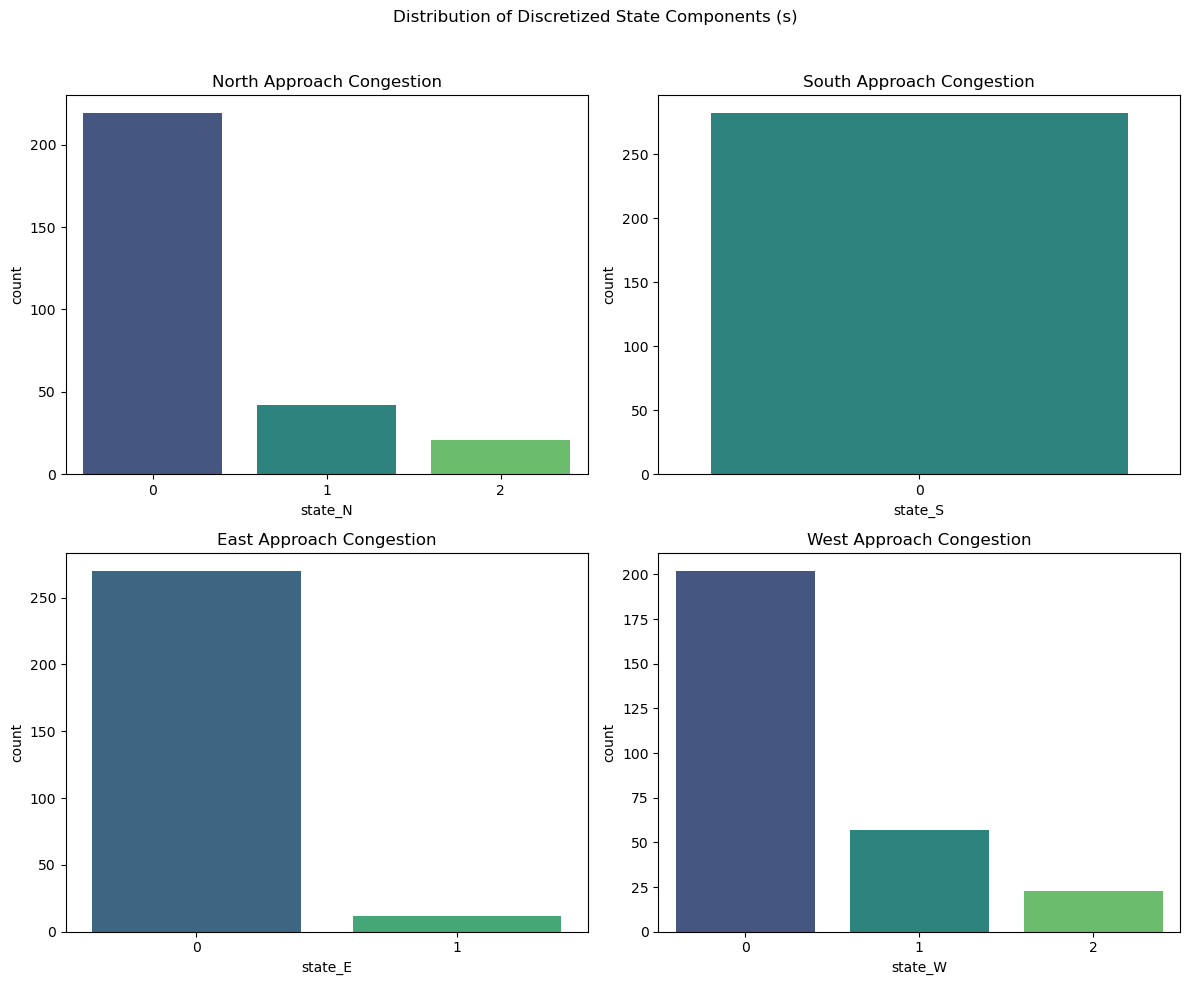

In [5]:
# Distribution of individual state components
fig_states, axes_states = plt.subplots(2, 2, figsize=(12, 10))
fig_states.suptitle('Distribution of Discretized State Components (s)')
sns.countplot(x='state_N', data=df, ax=axes_states[0, 0], palette="viridis").set_title('North Approach Congestion')
sns.countplot(x='state_S', data=df, ax=axes_states[0, 1], palette="viridis").set_title('South Approach Congestion')
sns.countplot(x='state_E', data=df, ax=axes_states[1, 0], palette="viridis").set_title('East Approach Congestion')
sns.countplot(x='state_W', data=df, ax=axes_states[1, 1], palette="viridis").set_title('West Approach Congestion')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("state_component_distribution.png")
print("\nPlot saved: state_component_distribution.png")

Action distribution (%):
action
0    58.510638
1    41.489362
Name: proportion, dtype: float64
Plot saved: action_distribution.png


C:\Users\kfhan\AppData\Local\Temp\ipykernel_37180\660604540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='action', data=df, palette="pastel").set_title('Action Distribution')


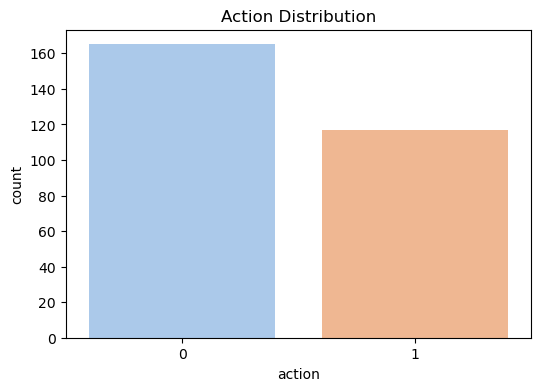

In [6]:
action_counts = df['action'].value_counts(normalize=True) * 100
print("Action distribution (%):")
print(action_counts)
plt.figure(figsize=(6, 4))
sns.countplot(x='action', data=df, palette="pastel").set_title('Action Distribution')
plt.savefig("action_distribution.png")
print("Plot saved: action_distribution.png")

Reward statistics:
count    282.000000
mean       0.369539
std        0.946724
min       -0.280000
25%       -0.060000
50%       -0.020000
75%        0.340000
max        4.840000
Name: reward, dtype: float64

Percentage of positive rewards (>0): 36.88%
Percentage of negative rewards (<0): 56.74%
Percentage of zero rewards (==0): 6.38%
Plot saved: reward_distribution.png


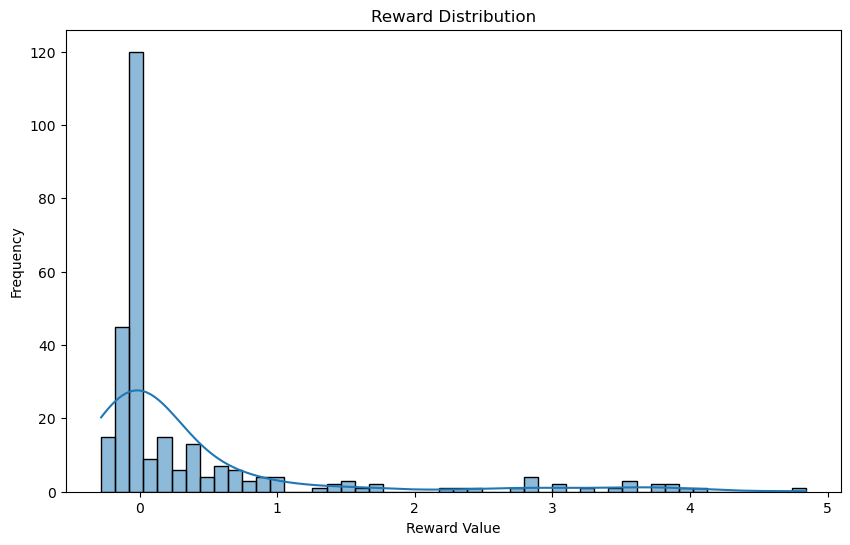

In [7]:
print("Reward statistics:")
print(df['reward'].describe())

positive_rewards_perc = (df['reward'] > 0).sum() / len(df) * 100
negative_rewards_perc = (df['reward'] < 0).sum() / len(df) * 100
zero_rewards_perc = (df['reward'] == 0).sum() / len(df) * 100
print(f"\nPercentage of positive rewards (>0): {positive_rewards_perc:.2f}%")
print(f"Percentage of negative rewards (<0): {negative_rewards_perc:.2f}%")
print(f"Percentage of zero rewards (==0): {zero_rewards_perc:.2f}%")

plt.figure(figsize=(10, 6))
sns.histplot(df['reward'], bins=50, kde=True).set_title('Reward Distribution')
plt.xlabel("Reward Value")
plt.ylabel("Frequency")
# Consider clipping for visualization if there are extreme outliers
# reward_clipped = np.clip(df['reward'], df['reward'].quantile(0.01), df['reward'].quantile(0.99))
# sns.histplot(reward_clipped, bins=50, kde=True).set_title('Reward Distribution (Clipped 1%-99%)')
plt.savefig("reward_distribution.png")
print("Plot saved: reward_distribution.png")

In [8]:
done_counts = df['done'].value_counts(normalize=True) * 100
print("'Done' flag distribution (%):")
print(done_counts)

'Done' flag distribution (%):
done
False    100.0
Name: proportion, dtype: float64


In [9]:
df['state_action_pair'] = df.apply(lambda row: (row['state_tuple'], row['action']), axis=1)
num_unique_state_action_pairs = df['state_action_pair'].nunique()
print(f"Number of unique state-action pairs: {num_unique_state_action_pairs}")
print("\nTop 10 most frequent state-action pairs:")
print(df['state_action_pair'].value_counts().nlargest(10))

Number of unique state-action pairs: 18

Top 10 most frequent state-action pairs:
state_action_pair
((0, 0, 0, 0), 0)    111
((0, 0, 0, 0), 1)     57
((1, 0, 0, 0), 1)     23
((2, 0, 0, 1), 0)     15
((0, 0, 0, 1), 0)     14
((0, 0, 0, 2), 1)     13
((1, 0, 0, 1), 0)      7
((1, 0, 0, 0), 0)      7
((0, 0, 0, 1), 1)      7
((0, 0, 1, 1), 0)      5
Name: count, dtype: int64
